In [1]:
from tensorflow.keras.datasets import reuters

In [2]:
# Import data
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
# Inspect data
len(train_data), len(test_data)

(8982, 2246)

In [4]:
# As with the IMDB reviews, each example is a list of integers (word indicies)
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
# Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# The indices are offset by 3 because 0, 1, and 2 are reserved indices for "padding", "start of sequence", and "unknown"
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])

In [8]:
decoded_newswire

'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

In [10]:
# The label associated with an example is an integer between 0 and 45
train_labels[10]

3

### Preparing the data

In [11]:
import numpy as np

In [13]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Vectorize the train and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

### Vectorize the labels

To vectorize the labels, there are two possibilities:

- You can cast the label list as an integer tensor
- Or, one-hot encode the labels

### note:

- One-hot encoding is a widely used format for categorical data, also called categorical encoding. In this case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a one in the place of the label index.

In [14]:
# Manual one-hot encoding
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# one_hot_train_labels = to_one_hot(train_labels)
# one_hot_test_labels = to_one_hot(test_labels)

In [16]:
# Using keras to one-hot encode the labels

from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
# Building the network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [19]:
# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [21]:
# Training the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 423us/sample - loss: 2.5966 - accuracy: 0.5219 - val_loss: 1.6883 - val_accuracy: 0.6390
Epoch 2/20
7982/7982 [==============================] - 2s 264us/sample - loss: 1.4126 - accuracy: 0.7082 - val_loss: 1.2897 - val_accuracy: 0.7160
Epoch 3/20
7982/7982 [==============================] - 2s 253us/sample - loss: 1.0634 - accuracy: 0.7732 - val_loss: 1.1583 - val_accuracy: 0.7490
Epoch 4/20
7982/7982 [==============================] - 2s 277us/sample - loss: 0.8472 - accuracy: 0.8212 - val_loss: 1.0664 - val_accuracy: 0.7640
Epoch 5/20
7982/7982 [==============================] - 2s 305us/sample - loss: 0.6726 - accuracy: 0.8612 - val_loss: 0.9859 - val_accuracy: 0.7920
Epoch 6/20
7982/7982 [==============================] - 2s 282us/sample - loss: 0.5367 - accuracy: 0.8889 - val_loss: 0.9267 - val_accuracy: 0.8080
Epoch 7/20
7982/7982 [==============================] - 2s 261us

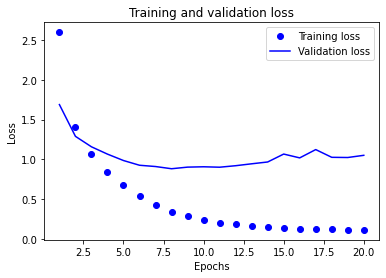

In [22]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

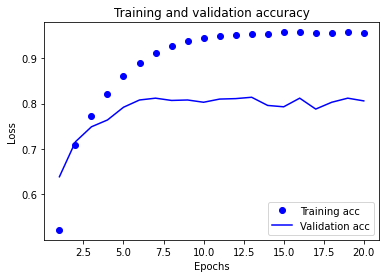

In [23]:
# Plotting the training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Retraining a model from scratch

In [24]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 389us/sample - loss: 2.6437 - accuracy: 0.5256 - val_loss: 1.7399 - val_accuracy: 0.6440
Epoch 2/9
7982/7982 [==============================] - 2s 241us/sample - loss: 1.4265 - accuracy: 0.7008 - val_loss: 1.2837 - val_accuracy: 0.7190
Epoch 3/9
7982/7982 [==============================] - 2s 248us/sample - loss: 1.0395 - accuracy: 0.7844 - val_loss: 1.1205 - val_accuracy: 0.7720
Epoch 4/9
7982/7982 [==============================] - 2s 241us/sample - loss: 0.8093 - accuracy: 0.8304 - val_loss: 1.0078 - val_accuracy: 0.7900
Epoch 5/9
7982/7982 [==============================] - 2s 236us/sample - loss: 0.6416 - accuracy: 0.8695 - val_loss: 0.9299 - val_accuracy: 0.8110
Epoch 6/9
7982/7982 [==============================] - 2s 241us/sample - loss: 0.5119 - accuracy: 0.8950 - val_loss: 0.8918 - val_accuracy: 0.8140
Epoch 7/9
7982/7982 [==============================] - 2s 237us/sample

In [25]:
# Random baseline

import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18432769367764915

In [26]:
# Generating predictions for new data
predictions = model.predict(x_test)

In [27]:
# Each entry in predictions is a vector of length 46 (since 46 classes)
predictions[0].shape

(46,)

In [28]:
# The coefficients in this vector sum to 1
np.sum(predictions[0])

0.9999999

In [29]:
# The largest entry in the predicted class - the class with the highest probability
np.argmax(predictions[0])

3

# A different way to handle the labels and the loss

In [30]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

### Note:

The only thing this approach would change is the choice of loss function. The loss function in the previous example, categorical_crossentropy, expects the labels to follow a categorical encoding. With integer labels, you should use sparce_categorical_crossentropy

In [31]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Note:

This loss function is still mathematically the same as categorical_crossentropy; it just has a different interface.

### The importance of having sufficiently large intermediate layers

We mentioned earlier that because the final outputs are 46-dimensional, you should avoid intermediate layers with many fewer than 46 hidden units. Now let's see what happens when you introduce an information bottleneck by having intermediate layers that are significantly less than 46-dimensional: for example, 4-dimensional

In [32]:
# A model with an informational bottleneck

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 474us/sample - loss: 3.1754 - accuracy: 0.0709 - val_loss: 2.5157 - val_accuracy: 0.3690
Epoch 2/20
7982/7982 [==============================] - 3s 417us/sample - loss: 2.1149 - accuracy: 0.4218 - val_loss: 1.8621 - val_accuracy: 0.5580
Epoch 3/20
7982/7982 [==============================] - 3s 430us/sample - loss: 1.6569 - accuracy: 0.5832 - val_loss: 1.6329 - val_accuracy: 0.5740
Epoch 4/20
7982/7982 [==============================] - 4s 453us/sample - loss: 1.4378 - accuracy: 0.5927 - val_loss: 1.5096 - val_accuracy: 0.5890
Epoch 5/20
7982/7982 [==============================] - 4s 447us/sample - loss: 1.2818 - accuracy: 0.6267 - val_loss: 1.4551 - val_accuracy: 0.6180
Epoch 6/20
7982/7982 [==============================] - 4s 455us/sample - loss: 1.1439 - accuracy: 0.6719 - val_loss: 1.3790 - val_accuracy: 0.6610
Epoch 7/20
7982/7982 [==============================] - 4s 468us

# Further experiments

In [33]:
# Model with only 1 hidden layer
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 474us/sample - loss: 1.8034 - accuracy: 0.6525 - val_loss: 1.1738 - val_accuracy: 0.7480
Epoch 2/20
7982/7982 [==============================] - 3s 433us/sample - loss: 0.9191 - accuracy: 0.8043 - val_loss: 0.9525 - val_accuracy: 0.8080
Epoch 3/20
7982/7982 [==============================] - 3s 436us/sample - loss: 0.6274 - accuracy: 0.8731 - val_loss: 0.8476 - val_accuracy: 0.8280
Epoch 4/20
7982/7982 [==============================] - 3s 427us/sample - loss: 0.4488 - accuracy: 0.9080 - val_loss: 0.8039 - val_accuracy: 0.8290
Epoch 5/20
7982/7982 [==============================] - 4s 445us/sample - loss: 0.3357 - accuracy: 0.9266 - val_loss: 0.7938 - val_accuracy: 0.8320
Epoch 6/20
7982/7982 [==============================] - 4s 469us/sample - loss: 0.2604 - accuracy: 0.9394 - val_loss: 0.8334 - val_accuracy: 0.8200
Epoch 7/20
7982/7982 [==============================] - 3s 424us

In [34]:
# 2 hidden layers with 64 hidden units
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 524us/sample - loss: 1.8253 - accuracy: 0.6181 - val_loss: 1.2544 - val_accuracy: 0.7170
Epoch 2/20
7982/7982 [==============================] - 4s 465us/sample - loss: 0.9703 - accuracy: 0.7883 - val_loss: 1.0120 - val_accuracy: 0.7740
Epoch 3/20
7982/7982 [==============================] - 4s 449us/sample - loss: 0.6532 - accuracy: 0.8579 - val_loss: 0.9611 - val_accuracy: 0.7930
Epoch 4/20
7982/7982 [==============================] - 3s 422us/sample - loss: 0.4554 - accuracy: 0.9017 - val_loss: 0.8753 - val_accuracy: 0.8200
Epoch 5/20
7982/7982 [==============================] - 3s 436us/sample - loss: 0.3256 - accuracy: 0.9288 - val_loss: 0.8874 - val_accuracy: 0.8130
Epoch 6/20
7982/7982 [==============================] - 3s 413us/sample - loss: 0.2553 - accuracy: 0.9427 - val_loss: 0.9427 - val_accuracy: 0.8120
Epoch 7/20
7982/7982 [==============================] - 3s 397us

In [35]:
# 2 hidden layers with 128 hidden units
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(10000,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 665us/sample - loss: 1.5500 - accuracy: 0.6726 - val_loss: 1.0698 - val_accuracy: 0.7610
Epoch 2/20
7982/7982 [==============================] - 5s 630us/sample - loss: 0.7427 - accuracy: 0.8400 - val_loss: 0.8856 - val_accuracy: 0.8180
Epoch 3/20
7982/7982 [==============================] - 5s 614us/sample - loss: 0.4466 - accuracy: 0.9050 - val_loss: 0.8581 - val_accuracy: 0.8190
Epoch 4/20
7982/7982 [==============================] - 5s 580us/sample - loss: 0.2879 - accuracy: 0.9361 - val_loss: 0.8612 - val_accuracy: 0.8260
Epoch 5/20
7982/7982 [==============================] - 5s 591us/sample - loss: 0.2262 - accuracy: 0.9466 - val_loss: 1.1224 - val_accuracy: 0.7830
Epoch 6/20
7982/7982 [==============================] - 5s 576us/sample - loss: 0.1926 - accuracy: 0.9503 - val_loss: 0.9076 - val_accuracy: 0.8120
Epoch 7/20
7982/7982 [==============================] - 5s 599us

In [36]:
# 3 hidden layers with 128 hidden units
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(10000,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 6s 721us/sample - loss: 1.5802 - accuracy: 0.6456 - val_loss: 1.1150 - val_accuracy: 0.7580
Epoch 2/20
7982/7982 [==============================] - 5s 653us/sample - loss: 0.8142 - accuracy: 0.8147 - val_loss: 0.9333 - val_accuracy: 0.8030
Epoch 3/20
7982/7982 [==============================] - 5s 657us/sample - loss: 0.4876 - accuracy: 0.8909 - val_loss: 1.0151 - val_accuracy: 0.7800
Epoch 4/20
7982/7982 [==============================] - 5s 604us/sample - loss: 0.3160 - accuracy: 0.9296 - val_loss: 0.9759 - val_accuracy: 0.8140
Epoch 5/20
7982/7982 [==============================] - 5s 601us/sample - loss: 0.2356 - accuracy: 0.9425 - val_loss: 1.0498 - val_accuracy: 0.8010
Epoch 6/20
7982/7982 [==============================] - 5s 580us/sample - loss: 0.1900 - accuracy: 0.9515 - val_loss: 1.0347 - val_accuracy: 0.7980
Epoch 7/20
7982/7982 [==============================] - 5s 580us